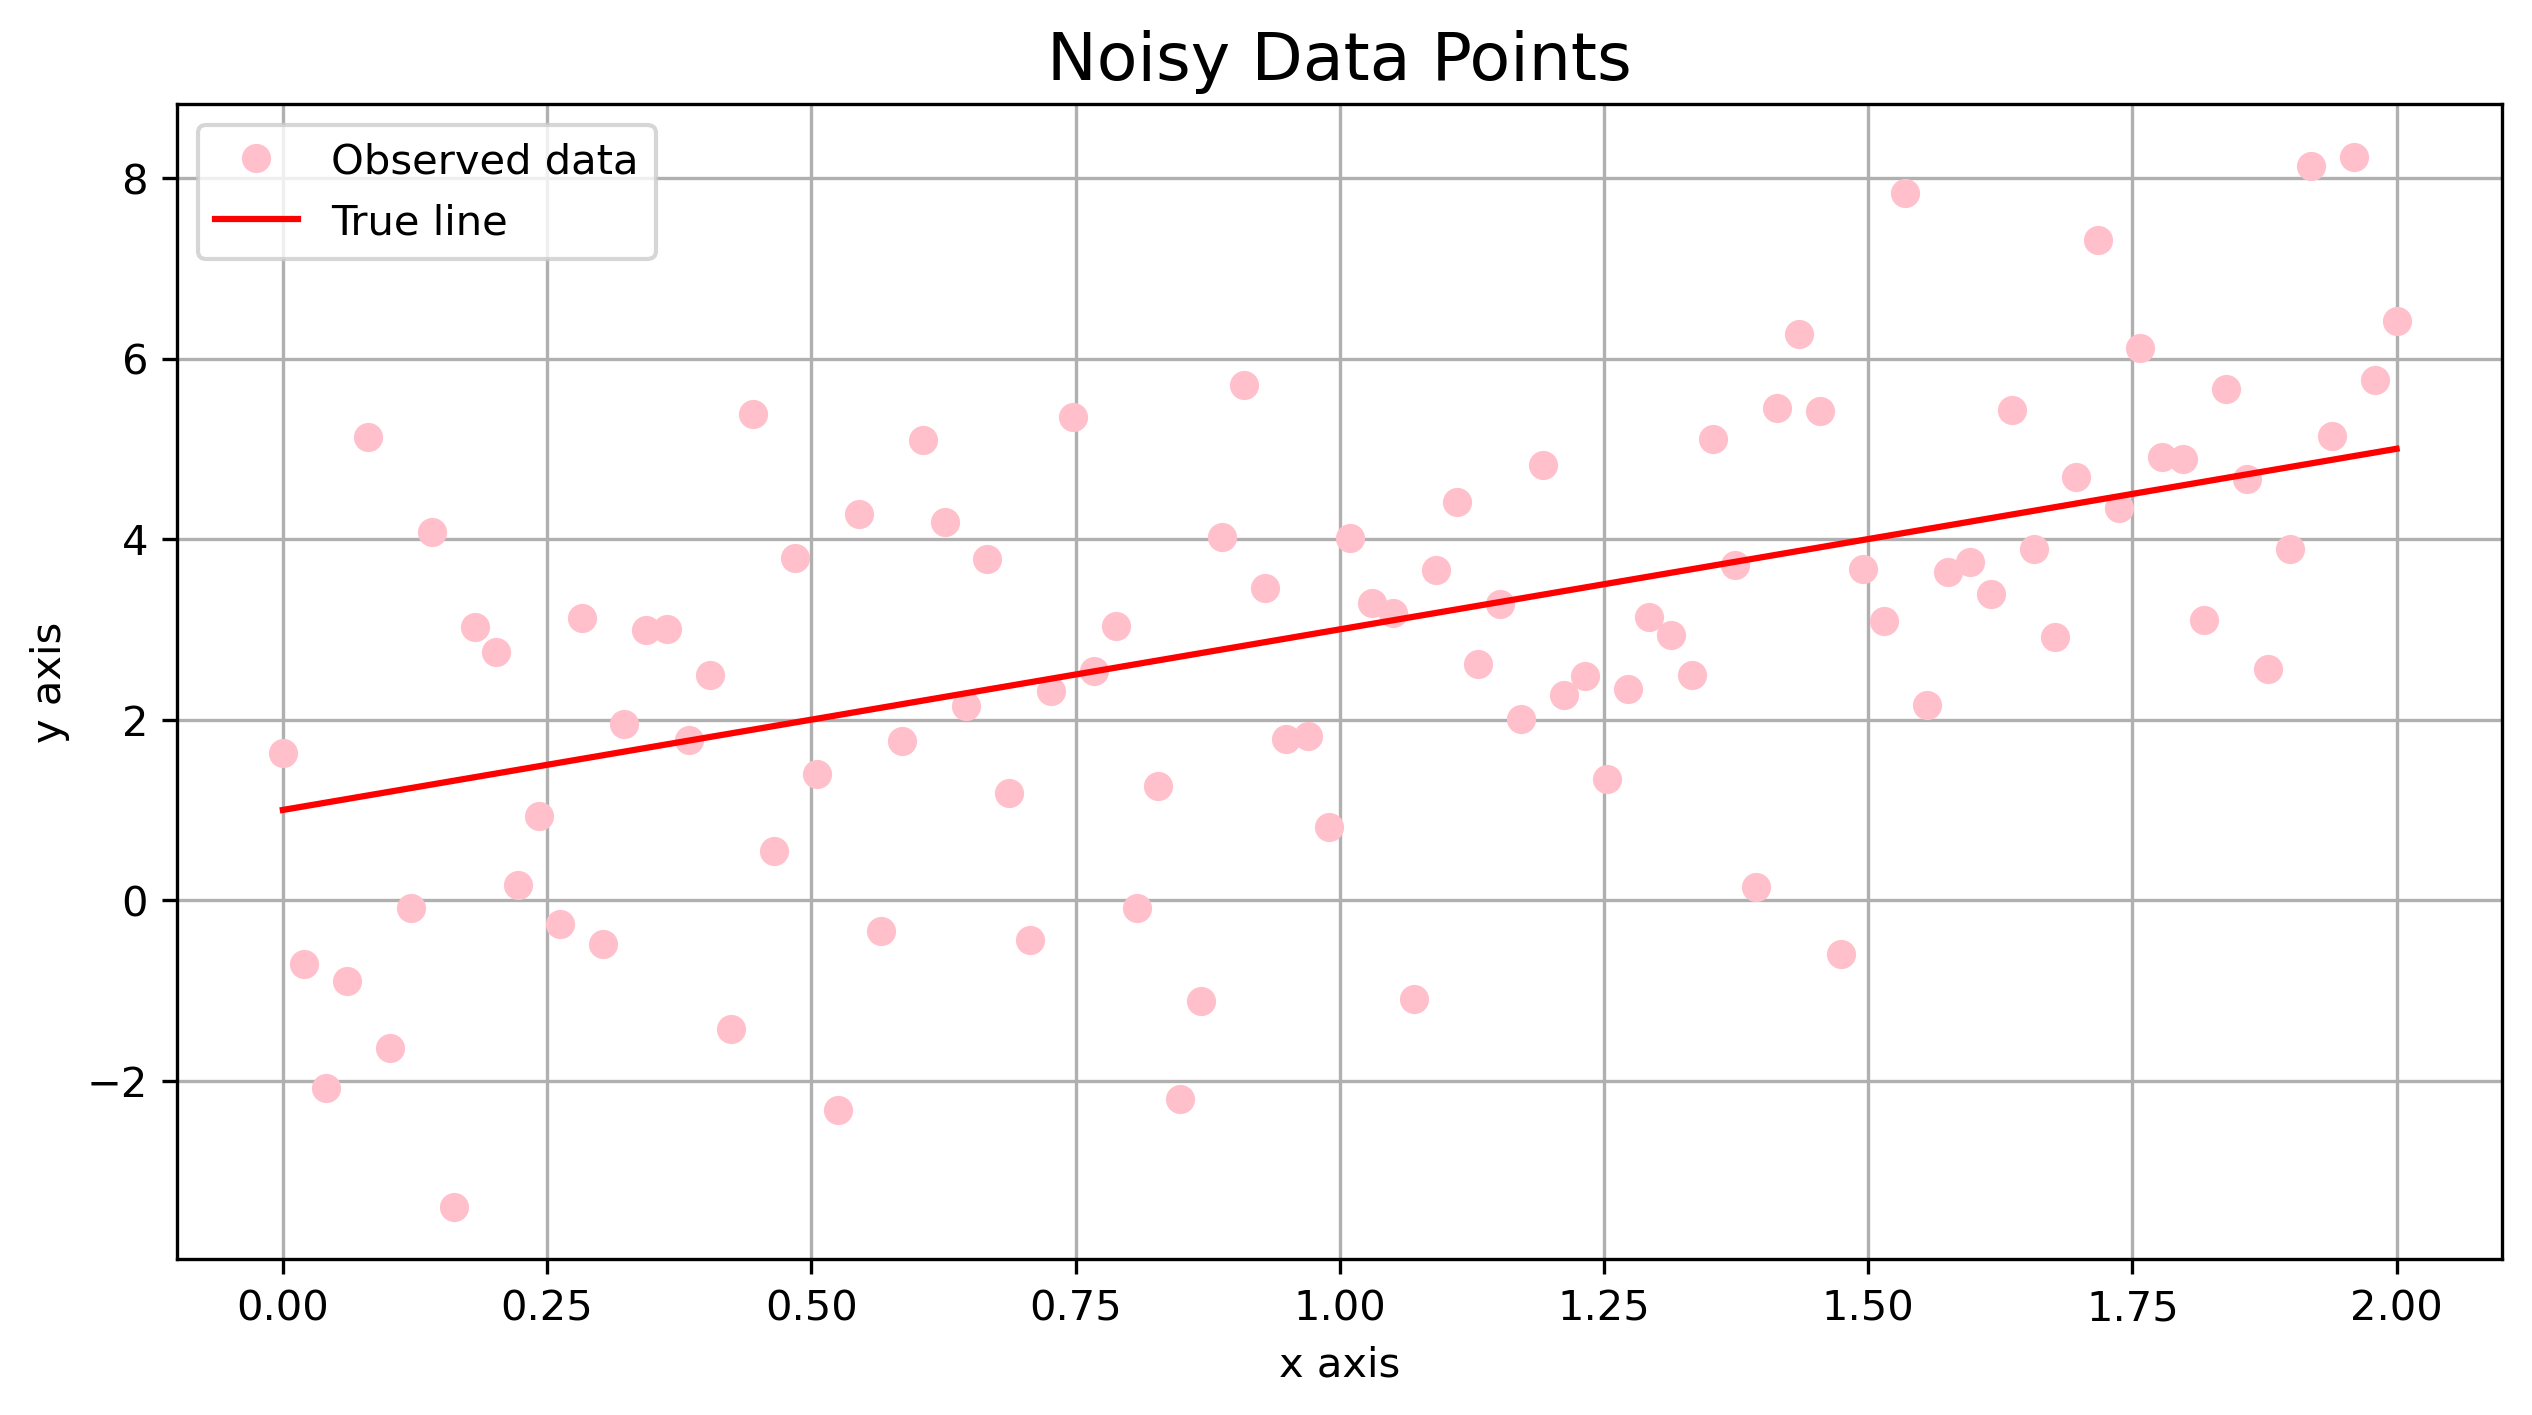

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# True values
m_true = 2
c_true = 1

# Generate some x values
x = np.linspace(0, 2, 100)

# Generate y values according to y = mx + c
y_true = m_true * x + c_true

# Add some Gaussian noise
y = y_true + np.random.normal(0, 2, len(x))

# Plot the data
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x, y, 'o', label='Observed data', color= 'pink')
plt.plot(x, y_true, label='True line', color = 'red')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Noisy Data Points', fontsize=16)
plt.grid(True)
plt.show()


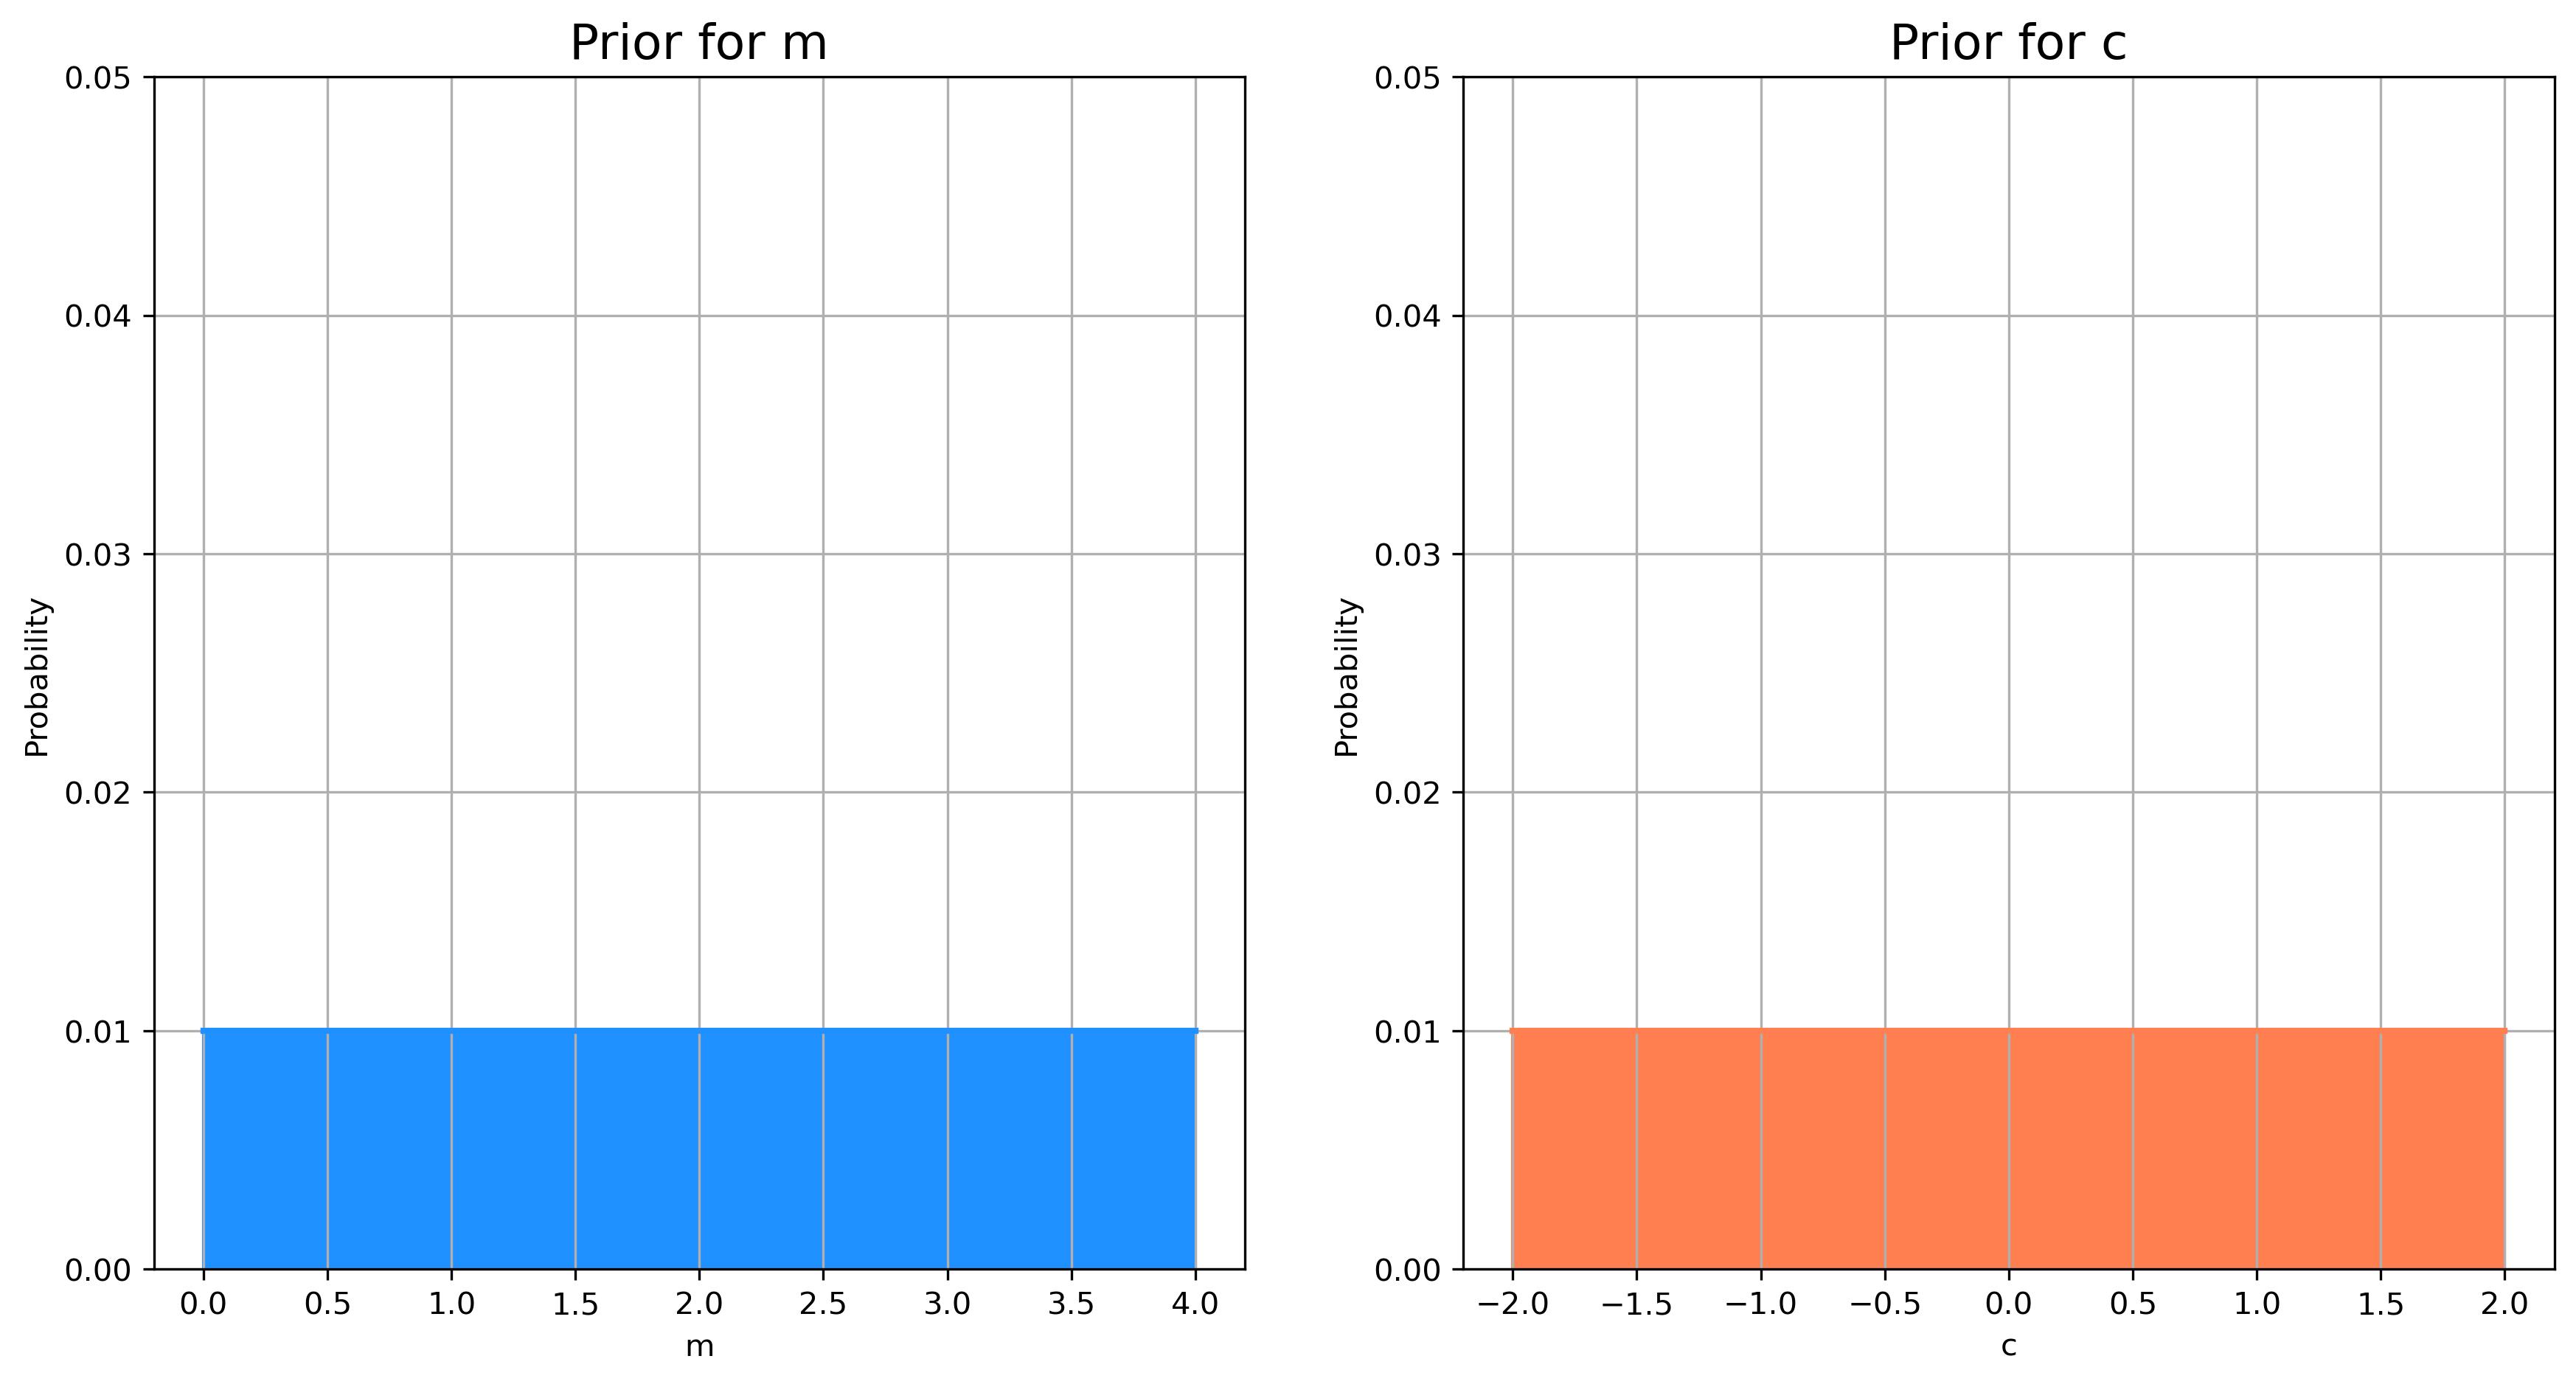

In [3]:
# Prior ranges
m_values = np.linspace(0, 4, 100)
c_values = np.linspace(-2, 2, 100)

# Flat priors
prior_m = np.ones_like(m_values) / len(m_values)
prior_c = np.ones_like(c_values) / len(c_values)

# Plot the priors
# Set the size and resolution of the figure
plt.figure(figsize=(14, 7), dpi=300)
plt.subplot(1, 2, 1)
plt.plot(m_values, prior_m, label='Prior for m', linewidth=2, color='dodgerblue')
plt.fill_between(m_values, prior_m, color = 'dodgerblue')
plt.xlabel('m')
plt.ylabel('Probability')
plt.ylim(0,0.05)
plt.title('Prior for m', fontsize=16)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(c_values, prior_c, label='Prior for c', linewidth=2, color='coral')
plt.fill_between(c_values, prior_c, color = 'coral')
plt.xlabel('c')
plt.ylabel('Probability')
plt.ylim(0,0.05)
plt.title('Prior for c', fontsize=16)
plt.grid(True)

plt.show()



In [4]:
# Standard deviation of the noise
sigma = 2

# Grid of parameter values
m_grid, c_grid = np.meshgrid(m_values, c_values)

# Calculate log-likelihood
log_likelihood = -0.5 * np.sum((y[:, None, None] - m_grid[None, :] * x[:, None, None] - c_grid[None, :])**2, axis=0) / sigma**2
log_likelihood -= 0.5 * len(x) * np.log(2 * np.pi * sigma**2)

# Exponentiate to get likelihood
likelihood = np.exp(log_likelihood)



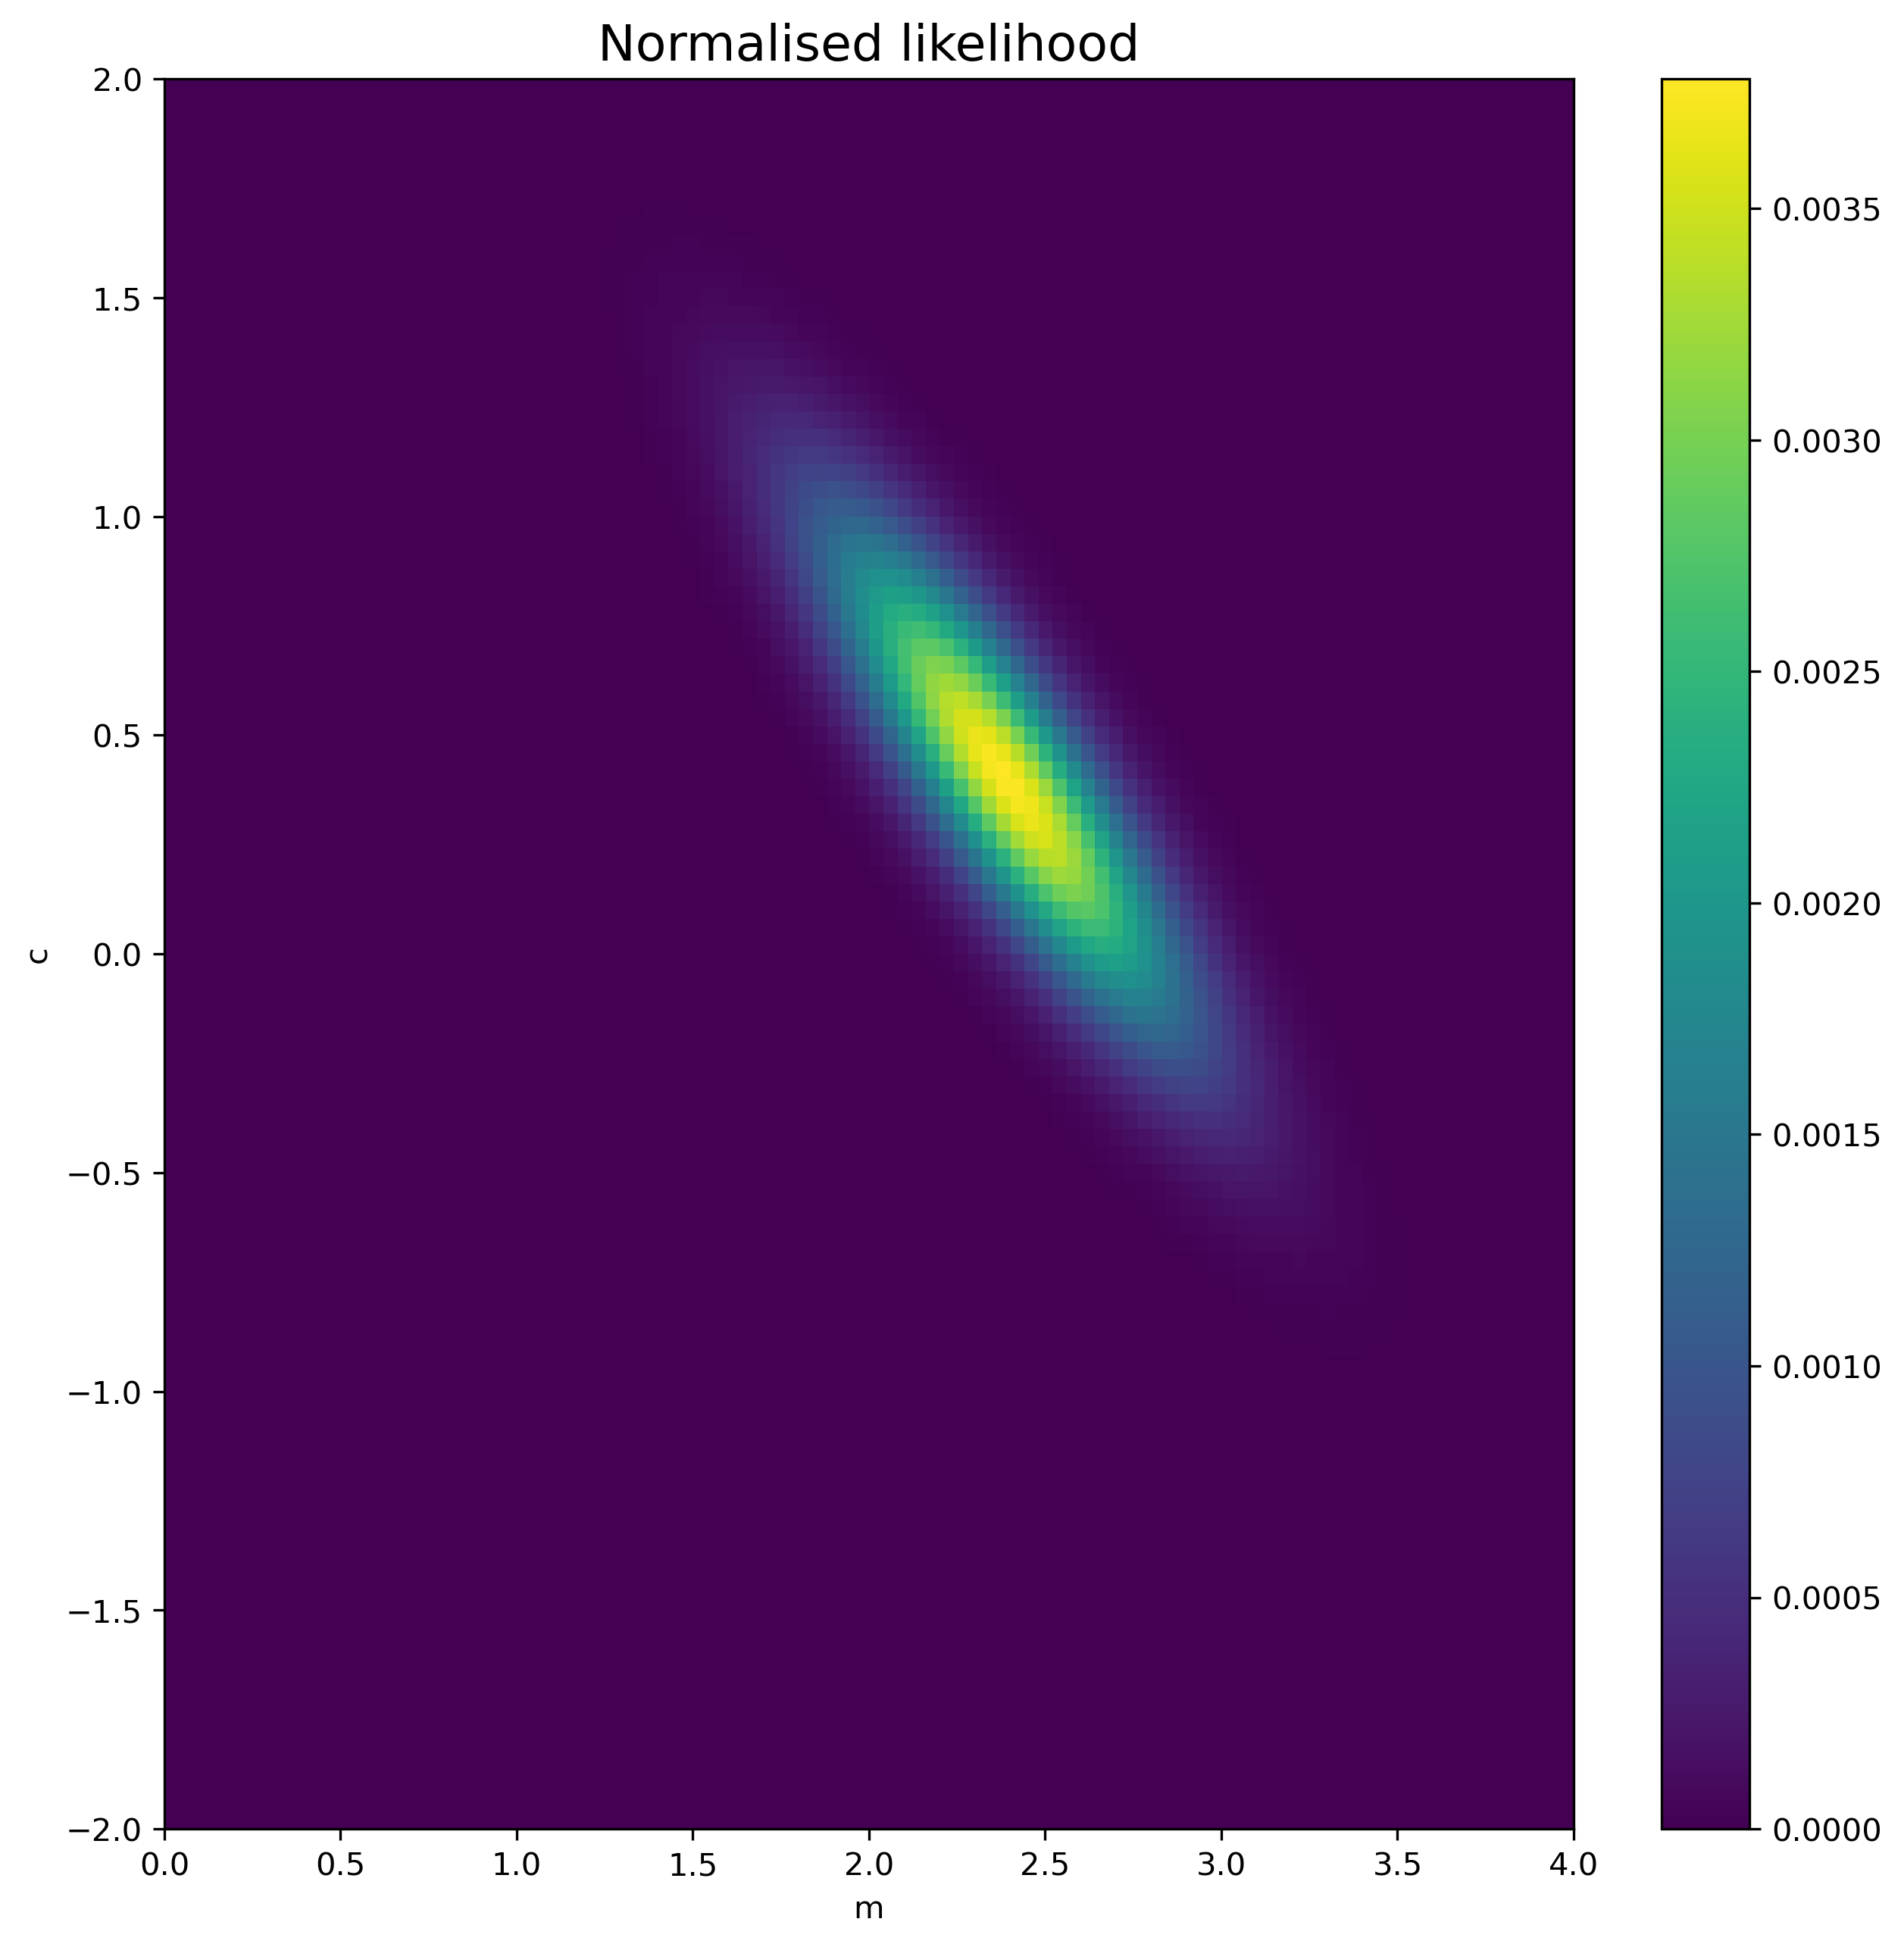

In [5]:
# Calculate unnormalized posterior
posterior = likelihood * prior_m[None, :] * prior_c[:, None]

# Normalize
posterior /= np.sum(posterior)


# Set the size and resolution of the figure
plt.figure(figsize=(10, 10), dpi=300)


plt.imshow(posterior, origin='lower', extent=(m_values[0], m_values[-1], c_values[0], c_values[-1]), aspect='auto')
plt.colorbar()
plt.xlabel('m')
plt.ylabel('c')
plt.title('Normalised likelihood', fontsize=16)
plt.show()

NameError: name 'marginal_m' is not defined

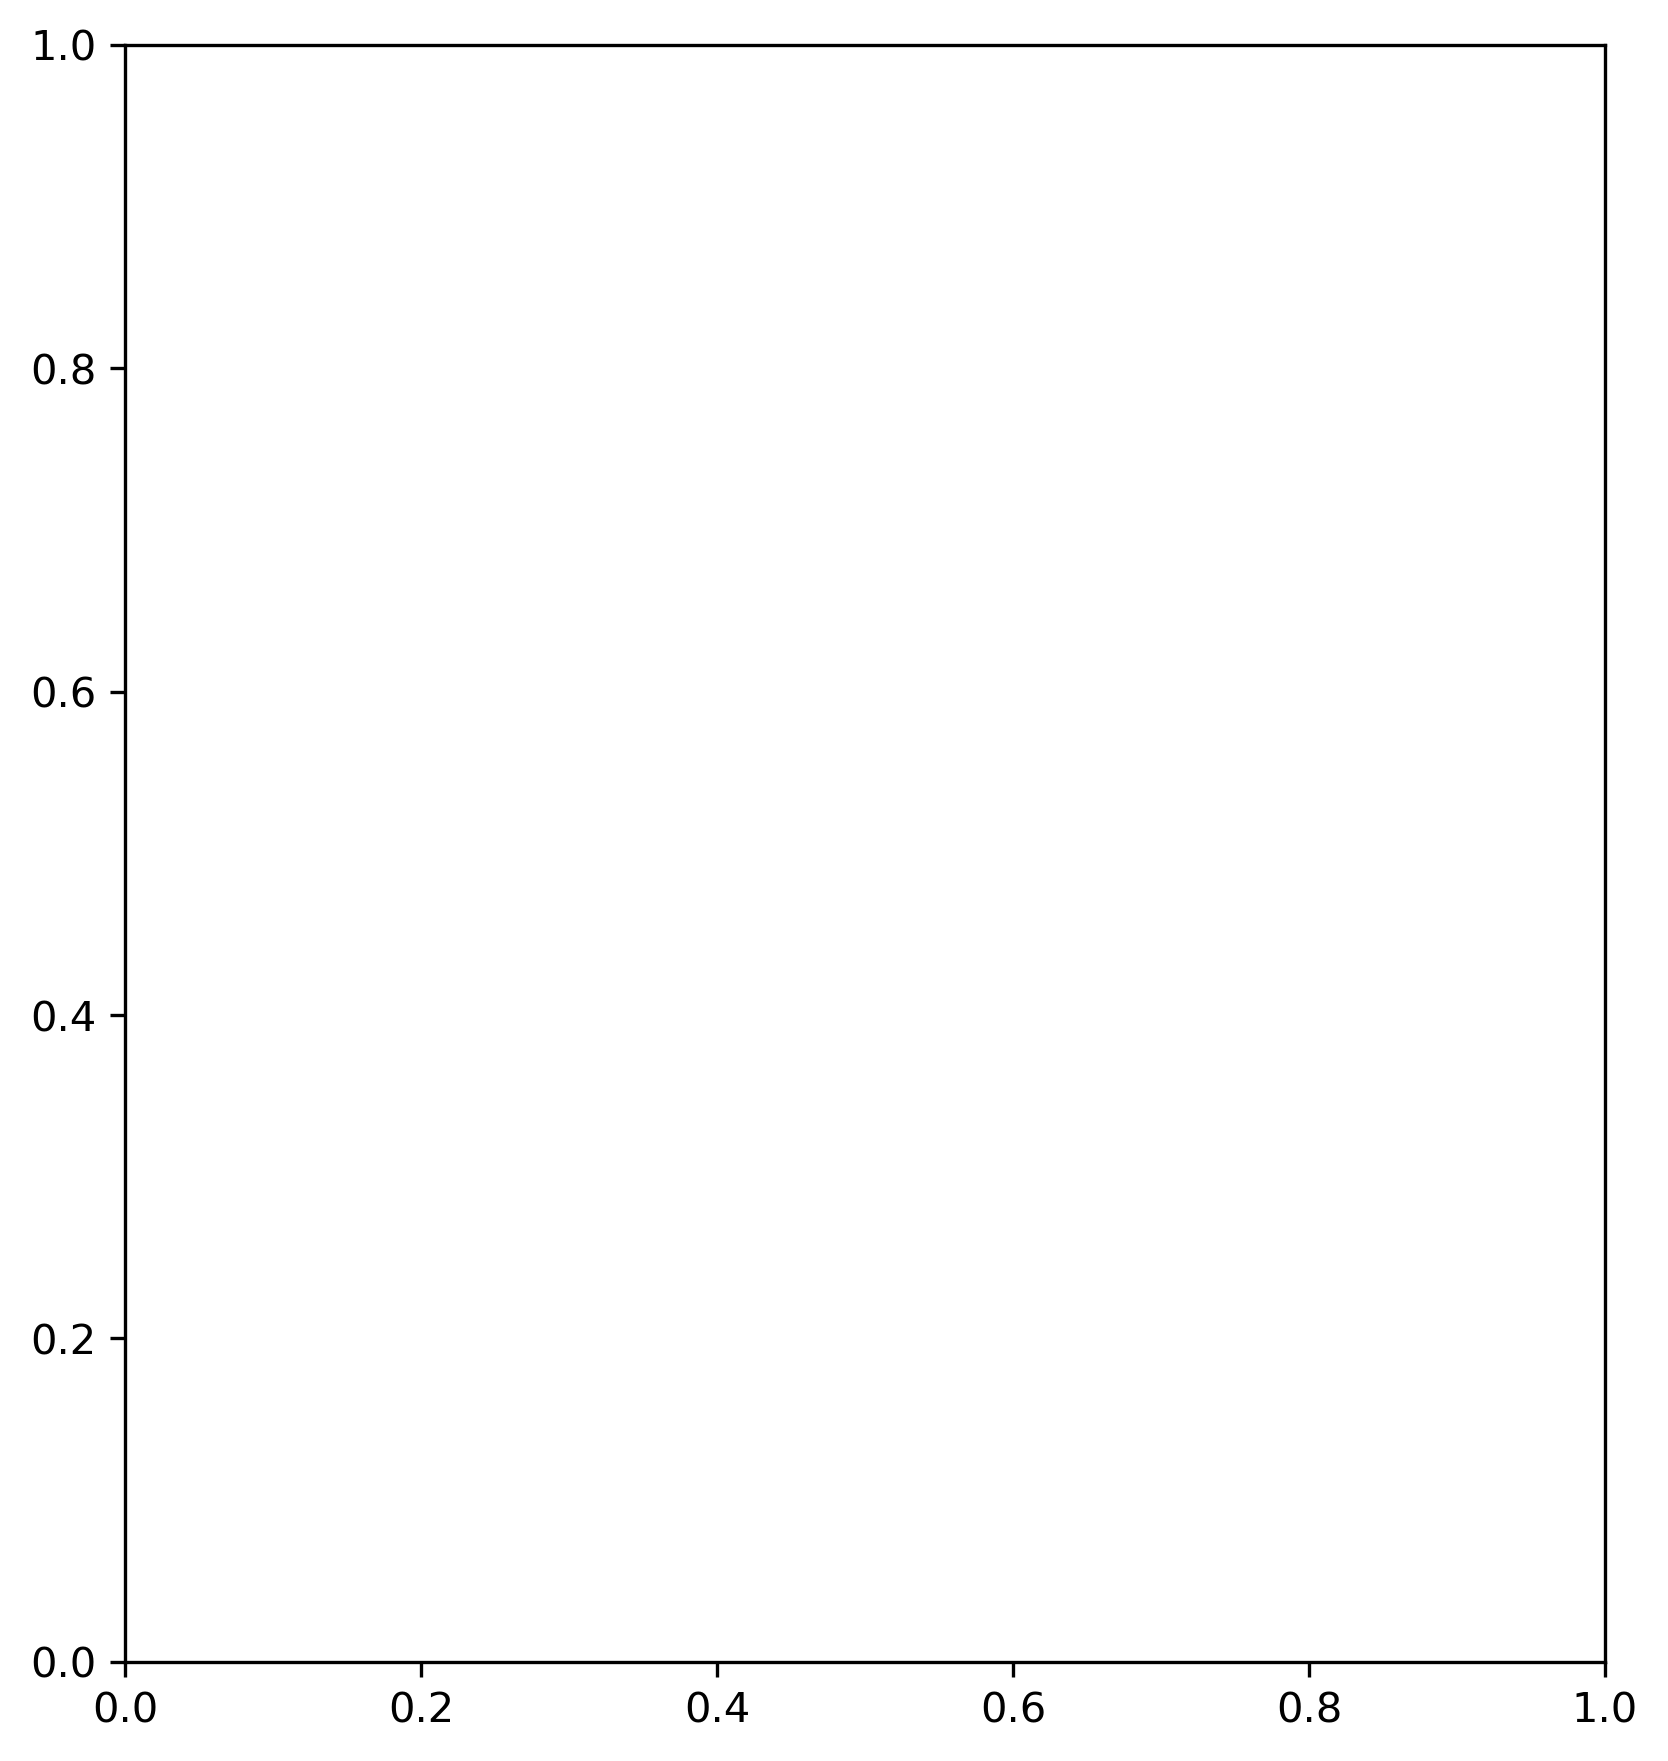

In [6]:
import matplotlib.pyplot as plt

# Set the size and resolution of the figure
plt.figure(figsize=(14, 7), dpi=300)

# Plot the marginal posterior for m
plt.subplot(1, 2, 1)
plt.plot(m_values, marginal_m, label='Marginal posterior for m', linewidth=2, color='dodgerblue')
plt.fill_between(m_values, marginal_m, color = 'dodgerblue')
plt.xlabel('m', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Marginal Posterior for m', fontsize=16)
plt.grid(True)


# Plot the marginal posterior for c
plt.subplot(1, 2, 2)
plt.plot(c_values, marginal_c, label='Marginal posterior for c', linewidth=2, color='coral')
plt.fill_between(c_values, marginal_c, color = 'coral')
plt.xlabel('c', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Marginal Posterior for c', fontsize=16)
plt.grid(True)


# Set the overarching title for the figure
plt.suptitle('Marginal Posteriors', fontsize=20)

# Show the figure
plt.show()


In [ ]:
# Flatten the 2D array and sort it in descending order
sorted_probs = np.sort(posterior.flatten())[::-1]

# Calculate the cumulative sum of the sorted probabilities
cumulative_probs = np.cumsum(sorted_probs)

# Find the threshold value that corresponds to the top 68.27% of the probabilities
threshold_index = np.where(cumulative_probs > 0.6827)[0][0]
threshold_value = sorted_probs[threshold_index]

# Initialize empty lists to store the coordinates
x_coords = []
y_coords = []

# Iterate over the 2D array to find the coordinates where the value is above the threshold
for i in range(posterior.shape[0]):
    for j in range(posterior.shape[1]):
        if posterior[i, j] >= threshold_value:
            x_coords.append(j)
            y_coords.append(i)

# Convert the lists to numpy arrays
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

# If there are more than 100 points, randomly select 100 points
if len(x_coords) > 100:
    indices = np.random.choice(len(x_coords), 100, replace=False)
    x_coords = x_coords[indices]
    y_coords = y_coords[indices]

In [ ]:
# Plot the data and the sampled lines
plt.figure(figsize=(10, 5), dpi=300)

for m, c in zip(m_values[x_coords], c_values[y_coords]):
    plt.plot(x, m * x + c, color='pink', alpha=0.1)

plt.plot(x, y, 'o', label='Observed data', color='red')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Inferred Linear Models', fontsize=16)
plt.grid(True)
plt.show()



NameError: name 'plt' is not defined